In [1]:
#Install Investpy library to take data from investing_com
!pip install investpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.2 MB/s 
     |████████████████████████████████| 235 kB 56.2 MB/s 
     |████████████████████████████████| 6.4 MB 40.0 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=b17e401352236842fc9115b954ef50b0d179855ad757932b7162016ce70b8298
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
# Import Library
import investpy as inv

In [3]:
#import dataset
df = inv.get_stock_historical_data(stock = 'AAPL',
                                 country = 'united states',
                                 from_date = '01/01/2020',
                              to_date = '31/12/2022')

In [4]:
#viewing dataset
df.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2020-01-02,74.06,75.15,73.80,75.09,135647456,USD
2020-01-03,74.29,75.14,74.12,74.36,146535520,USD
2020-01-06,73.45,74.99,73.19,74.95,118578576,USD
2020-01-07,74.96,75.22,74.37,74.60,111510624,USD
2020-01-08,74.29,76.11,74.29,75.80,132363784,USD


In [5]:
#Datatype info of the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629 entries, 2020-01-02 to 2022-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      629 non-null    float64
 1   High      629 non-null    float64
 2   Low       629 non-null    float64
 3   Close     629 non-null    float64
 4   Volume    629 non-null    int64  
 5   Currency  629 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 34.4+ KB


In [6]:
# Checking null values in the dataset
df.isna().sum()

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [7]:
#Genaral information of the dataset
df.describe().round(2)

,Open,High,Low,Close,Volume
count,629.00,629.00,629.00,629.00,6.290000e+02
mean,126.27,127.86,124.72,126.34,1.183413e+08
std,31.76,32.00,31.44,31.72,5.868757e+07
min,57.02,57.12,53.15,56.09,4.099995e+07
25%,110.41,112.20,108.73,110.34,8.031371e+07
50%,129.80,131.26,128.49,130.15,1.024043e+08
75%,148.81,149.83,147.48,148.85,1.375225e+08
max,182.63,182.94,179.12,182.01,4.268849e+08


In [8]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [9]:
df.reset_index(inplace = True)

In [10]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Currency
0,2020-01-02,74.06,75.15,73.80,75.09,135647456,USD
1,2020-01-03,74.29,75.14,74.12,74.36,146535520,USD
2,2020-01-06,73.45,74.99,73.19,74.95,118578576,USD
3,2020-01-07,74.96,75.22,74.37,74.60,111510624,USD
4,2020-01-08,74.29,76.11,74.29,75.80,132363784,USD


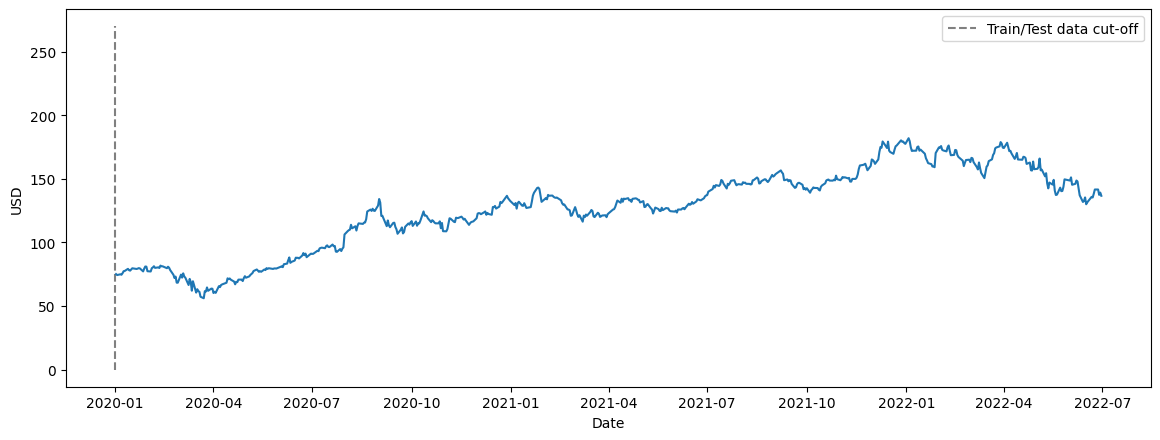

In [11]:
plt.figure(figsize=(14, 5), dpi=100)
plt.plot(df['Date'], df['Close'])
plt.vlines(datetime.date(2020,1,1), 0, 270, linestyles='--', colors='gray', label='Train/Test data cut-off')
plt.xlabel('Date')
plt.ylabel('USD')
plt.legend()
plt.show()

We can see that the market is in slow growth. We are going to normalise the data so that similar data points over time can be turned into one point.

In order to predict we are goin to need more features so we are going to use technical indicator.

List of technical indicators and explanation:

1. Bollinger bands: Bollinger Bands is used to define the prevailing high and low prices in a market to characterize the trading band of a financial instrument or commodity. Bollinger Bands are a volatility indicator. Bands are consists of Moving Average (MA) line, a upper band and lower band. The upper and lower bands are simply MA adding and subtracting standard deviation.

2. EMA: Exponential moving average is a better version of a simple moving average that doesnt have SMAs lag. Moving averages just average out the data for a given time so we know how the company's closing price are trending for a given amount of days. example for 4 days is price was 22,23 ,45,1 (the company crashed on 4th day) the average would be 23. Now 23 is a below average value so it gives us an idea that 45 was indeed just a fluke and that infact the company was always making losses EMA is calculated as: EMA(t)EMA(t0)=(1−α)EMA(t−1)+α p(t)=p(t0) where α=1L+1 and length of window is α=2M+1 I used the ewm(exponential weighted mean ) function to calculate ema.

3. Momentum: Momentum is perhaps the simplest and easiest oscillator (financial analysis tool) to understand and use. It is the measurement of the speed or velocity of price changes, or the rate of change in price movement for a particular asset.

The formula for momentum is:

Momentum=V−Vx where:

V=Latest price

Vx=Closing price

x=Number of days ago

Other features calculated are moving averages of 7 and 21 days and standard deviation.

In [12]:
def get_technical_indicators(dataset): #function to generate feature technical indicators
    
    
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Close'].rolling(window = 7).mean()
    dataset['ma21'] = dataset['Close'].rolling(window = 21).mean()
    
    #Create MACD
    dataset['26ema'] = dataset['Close'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Close'].ewm(span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])
    
    #Create Bollinger Bands
    dataset['20sd'] = dataset['Close'].rolling(window = 20).std()
    dataset['upper_band'] = (dataset['Close'].rolling(window = 20).mean()) + (dataset['20sd']*2)
    dataset['lower_band'] = (dataset['Close'].rolling(window = 20).mean()) - (dataset['20sd']*2)
    
    #Create Exponential moving average
    dataset['ema'] = dataset['Close'].ewm(com=0.5).mean()
    
    #Create Momentum
    dataset['momentum'] = (dataset['Close']/100)-1

    return dataset

In [13]:
TI_df = get_technical_indicators(df)

In [14]:
TI_df.head()

,Date,Open,High,Low,Close,Volume,Currency,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
0,2020-01-02,74.06,75.15,73.80,75.09,135647456,USD,NaN,NaN,75.090000,75.090000,0.000000,NaN,NaN,NaN,75.090000,-0.2491
1,2020-01-03,74.29,75.14,74.12,74.36,146535520,USD,NaN,NaN,74.710962,74.694583,-0.016378,NaN,NaN,NaN,74.542500,-0.2564
2,2020-01-06,73.45,74.99,73.19,74.95,118578576,USD,NaN,NaN,74.796846,74.794273,-0.002573,NaN,NaN,NaN,74.824615,-0.2505
3,2020-01-07,74.96,75.22,74.37,74.60,111510624,USD,NaN,NaN,74.741816,74.732948,-0.008868,NaN,NaN,NaN,74.673000,-0.2540
4,2020-01-08,74.29,76.11,74.29,75.80,132363784,USD,NaN,NaN,74.987213,75.022862,0.035649,NaN,NaN,NaN,75.427438,-0.2420


Ploting Technical Indicators

In [15]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)
    
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Close'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot
    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
    plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

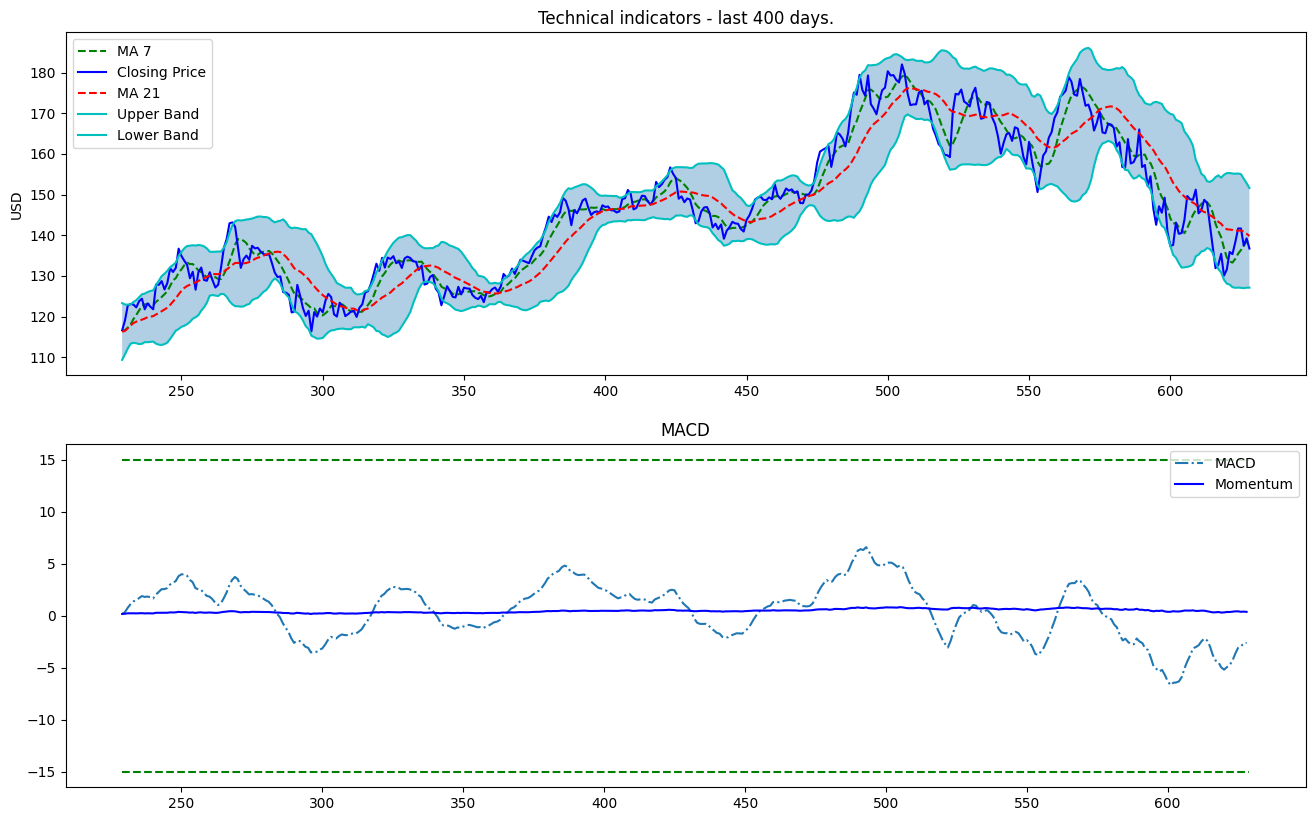

In [16]:
plot_technical_indicators(TI_df, 400)